/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1474394025.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=metrics, inplace=True)


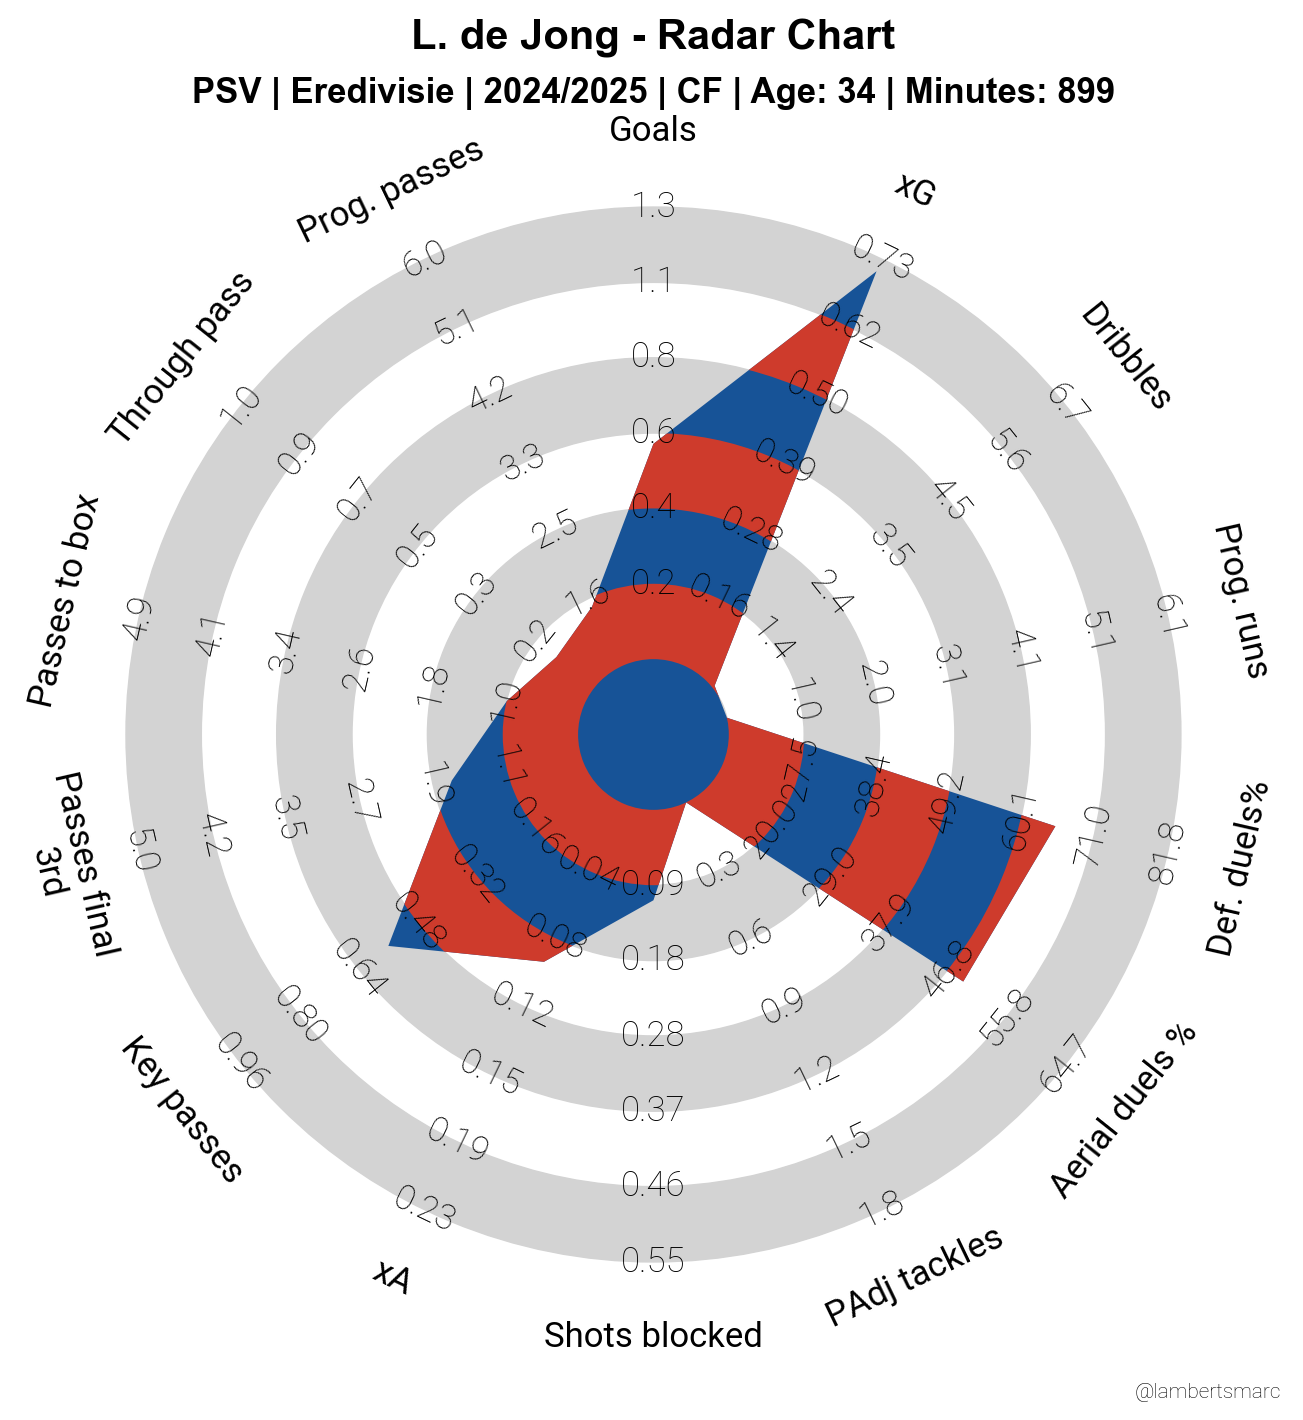

In [22]:
import pandas as pd
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = '/Users/marclambertes/Downloads/NEW.xlsx'
data = pd.read_excel(file_path)

# Metrics to use and rename
metrics = {
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes',
}

# Filter for players with 'Minutes played' > 500 and positions including 'CF'
filtered_data = data[(data['Minutes played'] > 500) & (data['Position'].str.contains('CF'))]

# Rename metrics in the filtered data
filtered_data.rename(columns=metrics, inplace=True)

# Select player and extract their values
player = 'L. de Jong'
player_data = filtered_data[filtered_data['Player'] == player]
if player_data.empty:
    raise ValueError(f"Player '{player}' not found in the data.")
player_values = player_data.iloc[0][list(metrics.values())].tolist()

# Calculate low and high values for each metric from the filtered data
low = filtered_data[list(metrics.values())].min().tolist()
high = filtered_data[list(metrics.values())].max().tolist()

# Radar parameters
params = list(metrics.values())

# Initialize radar with parameters, lower, and upper bounds
radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=6,
              ring_width=1,
              center_circle_radius=1)

# Load fonts
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

# Function to create radar mosaic
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

# Create the figure using the radar_mosaic function
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# Plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#D3D3D3', edgecolor='#D3D3D3')
radar_output = radar.draw_radar(player_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#175397'},
                                kwargs_rings={'facecolor': '#ce3b2c'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)


# Extract dynamic player details
player_team = player_data['Team'].iloc[0]  # Replace 'Team' with the correct column name in your data
player_position = player_data['Position'].iloc[0]  # Position of the player
player_age = player_data['Age'].iloc[0]  # Replace 'Age' with the correct column name in your data
player_minutes = player_data['Minutes played'].iloc[0]  # Replace 'Minutes played' with the correct column name

# Define additional dynamic details
league_name = "Eredivisie"  # Replace with the league name if available in your data
season_name = "2024/2025"  # Replace with the season name if available
positions_to_filter = "CF"  # The position filter you applied earlier

# Adding dynamic centered title with all player info
fig.text(
    0.5, 0.94,  # Centered horizontally at the top
    f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}",
    size=25, ha="center", va="center", color="black", fontname="Arial", weight="bold"
)

# Adding player name and radar chart title below the dynamic info
fig.text(
    0.5, 0.98,  # Centered below the main title
    f"{player} - Radar Chart",
    size=30, ha="center", va="center", color="black", fontname="Arial", weight="bold"
)

# Adding endnote text
axs['endnote'].text(0.99, 0.5, '@lambertsmarc', fontsize=15,
                    fontproperties=robotto_thin.prop, ha='right', va='center')

# Show the radar chart
plt.savefig(f'{player}.png', dpi=750, bbox_inches='tight', facecolor='#051650')
plt.show()


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/3843777894.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=metrics, inplace=True)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/3843777894.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='skyblue', alpha=0.7)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/3843777894.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True

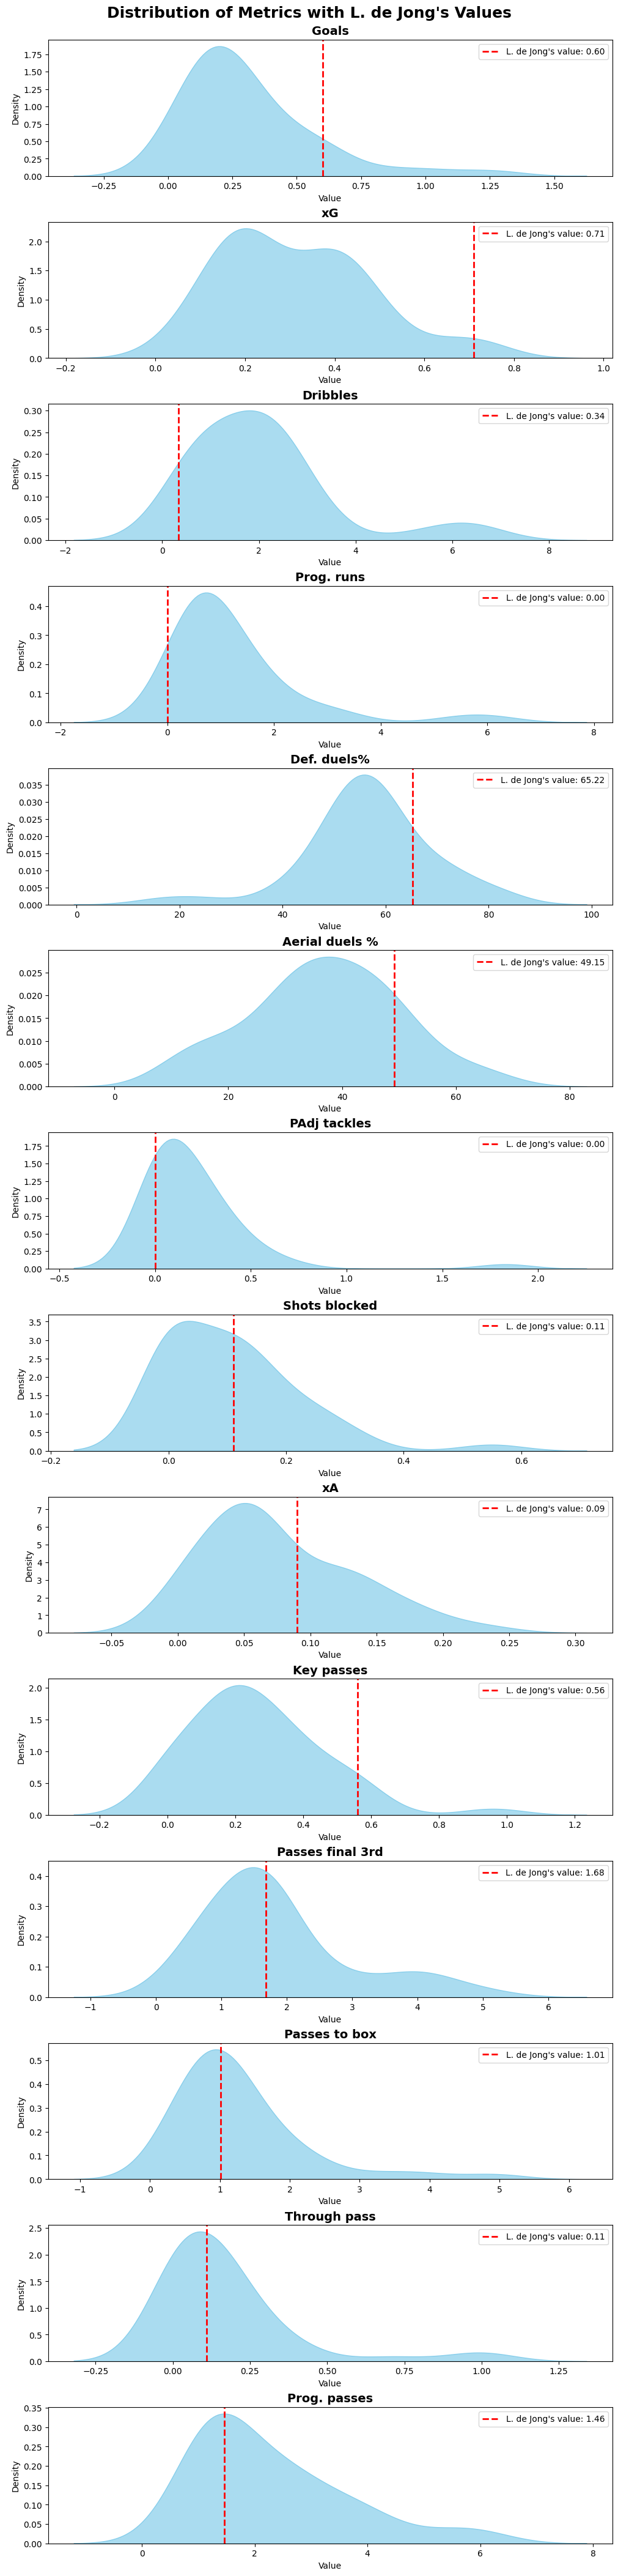

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel file
file_path = '/Users/marclambertes/Downloads/NEW.xlsx'
data = pd.read_excel(file_path)

# Metrics to use and rename
metrics = {
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes',
}

# Filter for players with 'Minutes played' > 500 and positions including 'CF'
filtered_data = data[(data['Minutes played'] > 500) & (data['Position'].str.contains('CF'))]

# Rename metrics in the filtered data
filtered_data.rename(columns=metrics, inplace=True)

# Select player and extract their values
player = 'L. de Jong'
player_data = filtered_data[filtered_data['Player'] == player]
if player_data.empty:
    raise ValueError(f"Player '{player}' not found in the data.")

# Create the KDE plots with player markers
num_metrics = len(metrics)  # Number of metrics to plot
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, num_metrics * 3), constrained_layout=True)

for ax, (metric_original, metric_renamed) in zip(axes, metrics.items()):
    # Extract the player's value for the metric
    player_value = player_data[metric_renamed].iloc[0]

    # Plot KDE for the metric
    sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='skyblue', alpha=0.7)
    ax.axvline(player_value, color='red', linestyle='--', linewidth=2, label=f"{player}'s value: {player_value:.2f}")
    ax.set_title(metric_renamed, fontsize=14, weight='bold')
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

# Add a main title for all plots
fig.suptitle(f"Distribution of Metrics with {player}'s Values", fontsize=18, weight="bold")

# Save the plot as a PNG file
output_path = f'/Users/marclambertes/Downloads/{player}_metrics_distribution.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1135969163.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=metrics, inplace=True)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1135969163.py:104: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1135969163.py:104: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=Tr

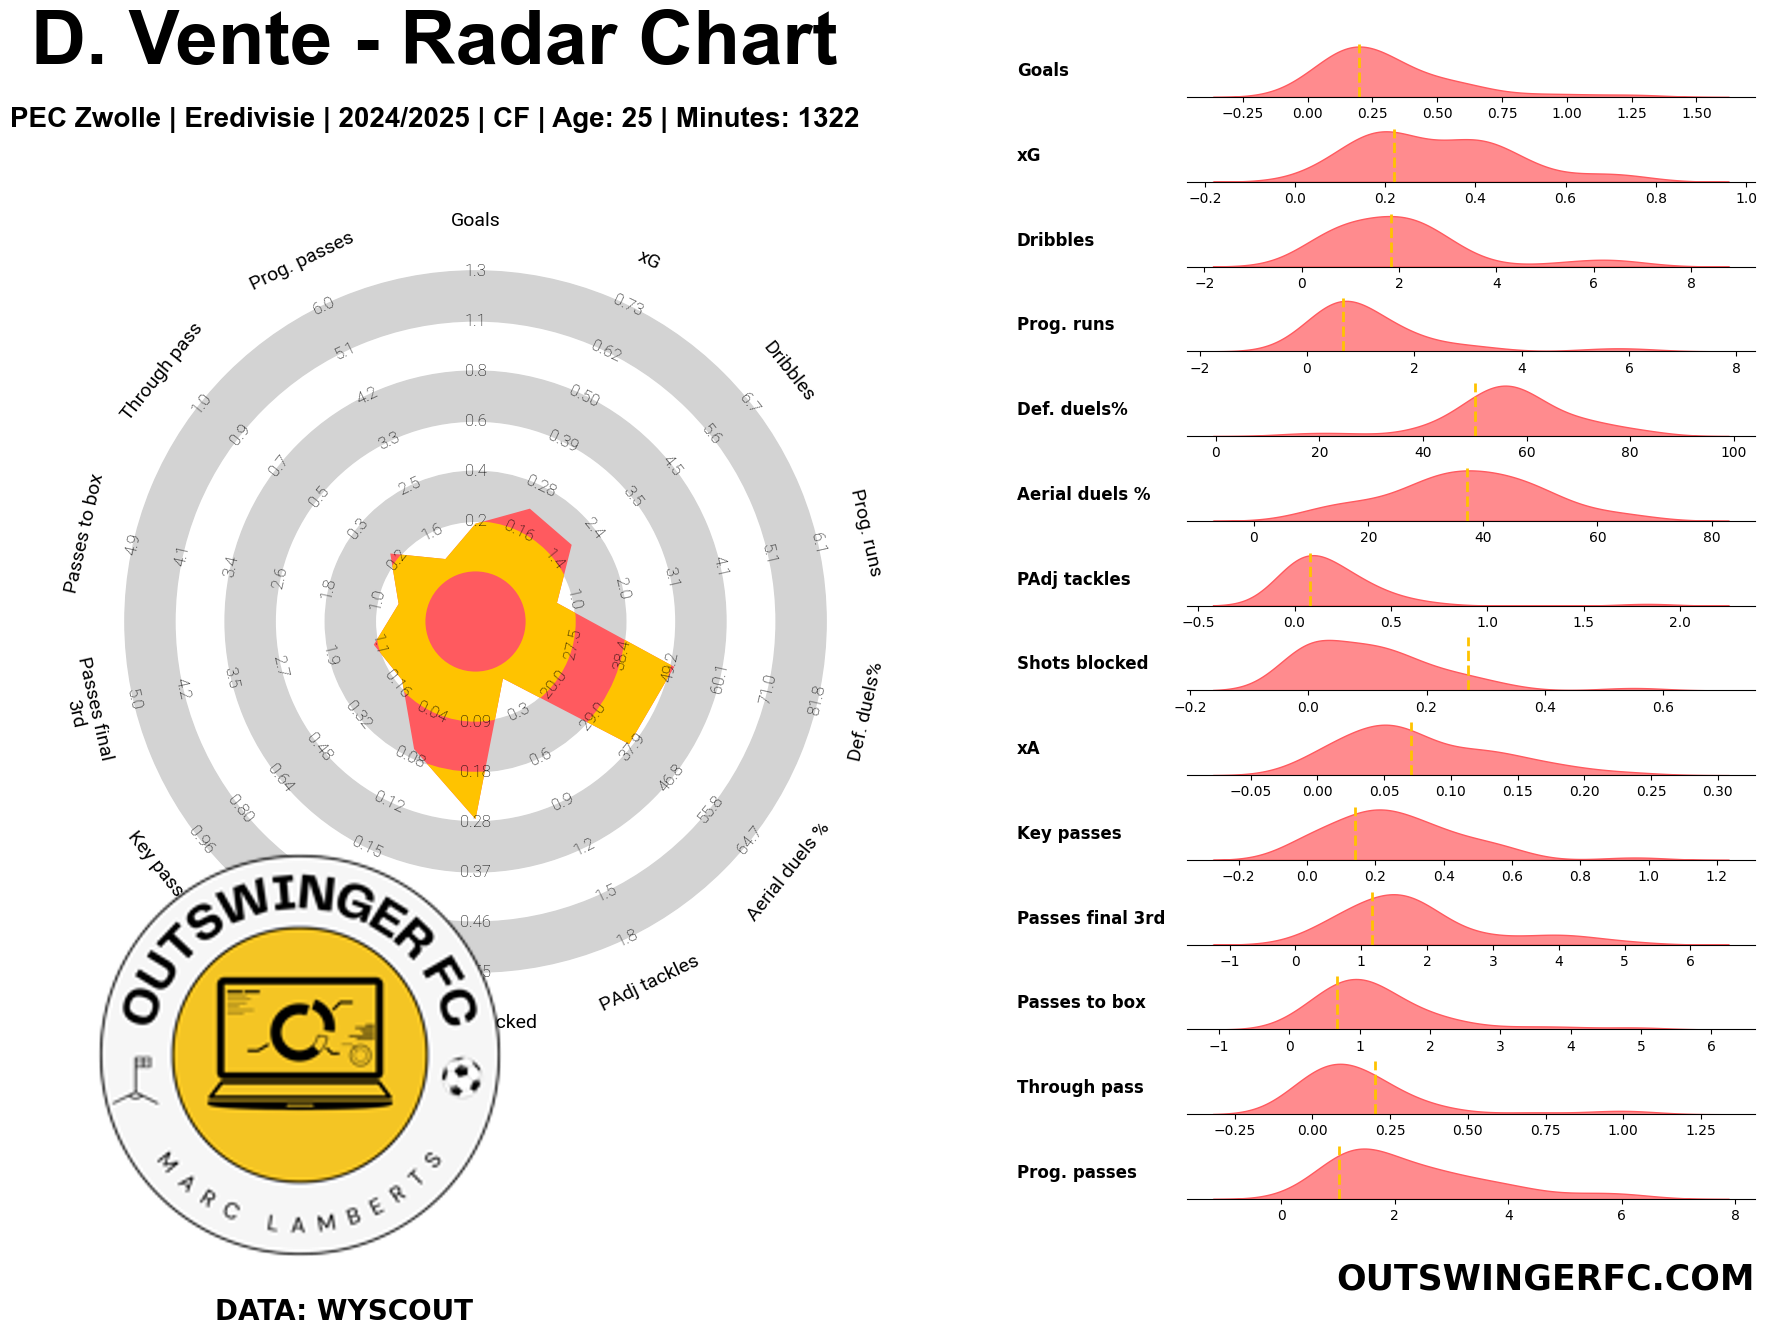

In [59]:
import pandas as pd
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg  # For loading the logo
from PIL import Image  # For resizing the logo

# Load the player data
file_path = '/Users/marclambertes/Downloads/NEW.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Metrics to use and rename
metrics = {
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes',
}

# Filter data
filtered_data = data[(data['Minutes played'] > 500) & (data['Position'].str.contains('CF'))]
filtered_data.rename(columns=metrics, inplace=True)

# Select player and extract data
player = 'D. Vente'
player_data = filtered_data[filtered_data['Player'] == player]
if player_data.empty:
    raise ValueError(f"Player '{player}' not found in the data.")

# Calculate min-max values for the filtered positions
low = filtered_data[list(metrics.values())].min().tolist()
high = filtered_data[list(metrics.values())].max().tolist()
params = list(metrics.values())

# Extract player's metric values
player_values = player_data.iloc[0][params].tolist()

# Extract dynamic player details
player_team = player_data['Team'].iloc[0]
player_position = player_data['Position'].iloc[0]
player_age = player_data['Age'].iloc[0]
player_minutes = player_data['Minutes played'].iloc[0]

# Define additional dynamic details
league_name = "Eredivisie"
season_name = "2024/2025"
positions_to_filter = "CF"

# Radar chart setup
radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=6,
              ring_width=1,
              center_circle_radius=1)

# Load fonts
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

# Create the figure layout
fig = plt.figure(figsize=(22, 15))  # Larger figure size
grid = plt.GridSpec(len(metrics), 3, width_ratios=[3, 0.3, 2], height_ratios=[1] * len(metrics), hspace=0.6)

# Radar Chart on the left
ax_radar = fig.add_subplot(grid[:, 0])  # Full height for radar chart
radar.setup_axis(ax=ax_radar)
radar.draw_circles(ax=ax_radar, facecolor='#D3D3D3', edgecolor='#D3D3D3')
radar_output = radar.draw_radar(player_values, ax=ax_radar,
                                kwargs_radar={'facecolor': '#FF5A5F'},
                                kwargs_rings={'facecolor': '#FFC300'})
radar.draw_range_labels(ax=ax_radar, fontsize=12, fontproperties=robotto_thin.prop)
radar.draw_param_labels(ax=ax_radar, fontsize=14, fontproperties=robotto_regular.prop)

# Dynamic title above the radar chart
fig.text(
    0.3, 0.88,  # Centered above the radar chart
    f"{player} - Radar Chart",
    size=55, ha="center", va="center", color="black", fontname="Arial", weight="bold"
)

fig.text(
    0.3, 0.83,  # Centered below the player name
    f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}",
    size=20, ha="center", va="center", color="black", fontname="Arial", weight="bold"
)

# Distribution Plots on the right, vertically stacked with titles on the left
for i, (metric_original, metric_renamed) in enumerate(metrics.items()):
    ax = fig.add_subplot(grid[i, 2])
    sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
    player_value = player_data[metric_renamed].iloc[0]
    ax.axvline(player_value, color='#FFC300', linestyle='--', linewidth=2)
    ax.text(-0.3, 0.5, metric_renamed, fontsize=12, fontweight='bold',
            transform=ax.transAxes, ha='left', va='center')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(left=False, bottom=True)
    ax.yaxis.set_ticks([])

# Add footer text
fig.text(0.90, 0.05, "OUTSWINGERFC.COM", fontsize=25, fontweight="bold", color="black", ha="right")

# Add a logo to the bottom-left corner
logo_path = '/Users/marclambertes/Python/Outswinger FC (3).png'
logo_img = Image.open(logo_path)
logo_img_resized = logo_img.resize((500, 500))
logo_img_resized = mpimg.pil_to_array(logo_img_resized)
fig.figimage(logo_img_resized, 50, 30, zorder=1, alpha=1)  # Lower the logo

# Add text next to the logo
fig.text(0.20, 0.03, "DATA: WYSCOUT", fontsize=20, fontweight="bold", color="black", ha="left")  # Adjusted text position

# Save the image
output_path = f"/Users/marclambertes/Downloads/{player}_performance_with_dynamic_title.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1570102774.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=metrics, inplace=True)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1570102774.py:157: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_96581/1570102774.py:157: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=Tr

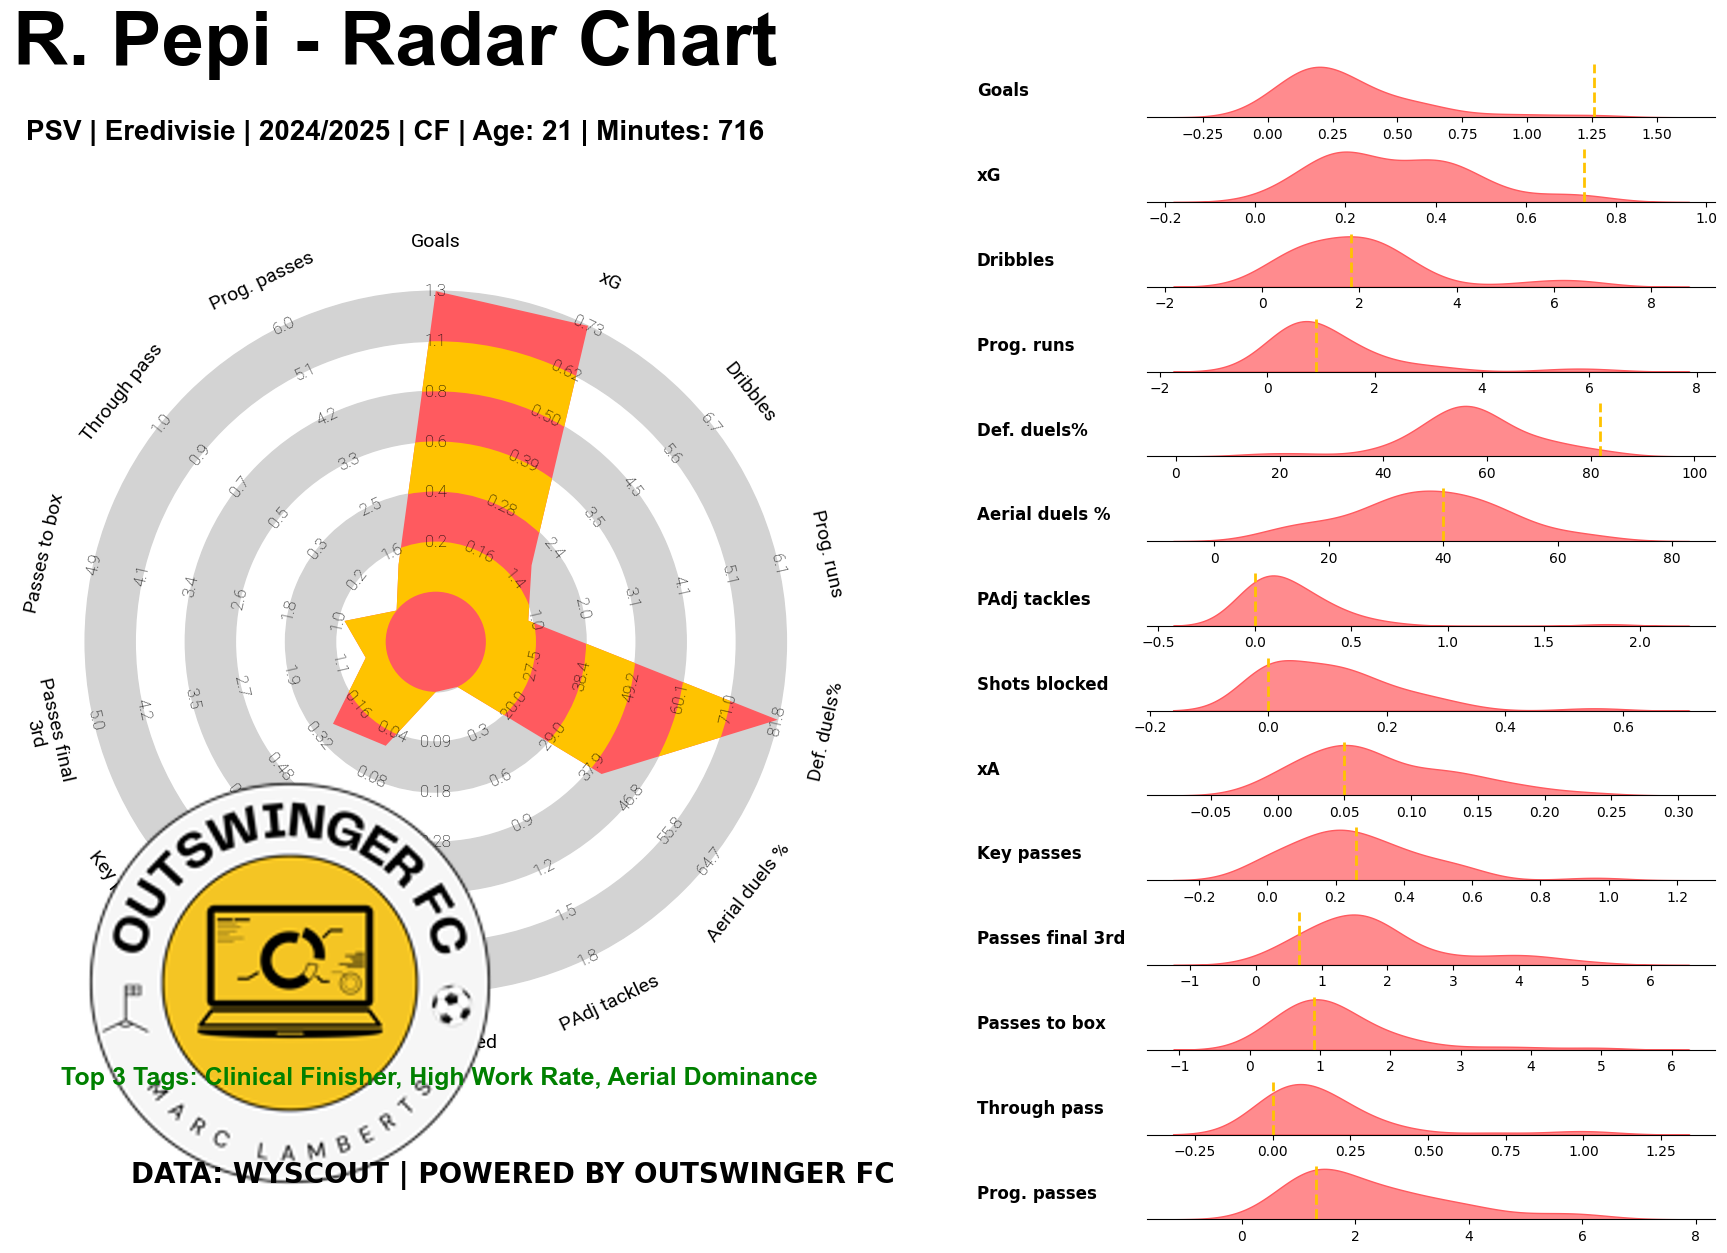

In [99]:
import pandas as pd
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg  # For loading the logo
from PIL import Image  # For resizing the logo

# Load the player data
file_path = '/Users/marclambertes/Downloads/NEW.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Metrics to use and rename
metrics = {
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes',
}

# Filter data for positions containing "CF"
positions_to_filter = "CF"
filtered_data = data[(data['Minutes played'] > 500) & (data['Position'].str.contains(positions_to_filter, case=False))]
filtered_data.rename(columns=metrics, inplace=True)

# Select player and extract data
player = 'R. Pepi'
player_data = filtered_data[filtered_data['Player'] == player]
if player_data.empty:
    raise ValueError(f"Player '{player}' not found in the data.")

# Calculate min-max values for the filtered positions
low = filtered_data[list(metrics.values())].min().tolist()
high = filtered_data[list(metrics.values())].max().tolist()
params = list(metrics.values())

# Extract player's metric values
player_values = player_data.iloc[0][params].tolist()

# Extract dynamic player details
player_team = player_data['Team'].iloc[0]
player_position = player_data['Position'].iloc[0]
player_age = player_data['Age'].iloc[0]
player_minutes = player_data['Minutes played'].iloc[0]

# Define additional dynamic details
league_name = "Eredivisie"
season_name = "2024/2025"

# Radar chart setup
radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=6,
              ring_width=1,
              center_circle_radius=1)

# Load fonts
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

# Function to generate player tags
def generate_player_tags(player_data, filtered_data):
    """Generate tags for a player based on their metrics."""
    tags = []
    metrics_map = {
        'Goals': 'Clinical Finisher',
        'xA': 'Creative Playmaker',
        'Dribbles': 'Dribble Specialist',
        'Prog. runs': 'Ball Carrier',
        'Def. duels%': 'High Work Rate',
        'Aerial duels %': 'Aerial Dominance',
        'Prog. passes': 'Progressive Passer',
        'Passes to box': 'Playmaker',
    }
    
    for metric, tag in metrics_map.items():
        player_value = player_data[metric].iloc[0]
        # Calculate percentile for the player
        percentile = (player_value - filtered_data[metric].min()) / (
            filtered_data[metric].max() - filtered_data[metric].min()
        ) * 100
        
        # Add tag if the player is in the top 25% for that metric
        if percentile >= 75:
            tags.append(tag)
    
    return tags

# Generate top 3 tags
def get_top_tags(player_data, filtered_data, metrics_map):
    """Get the top 3 tags for a player based on their metrics."""
    scores = {}
    for metric, tag in metrics_map.items():
        player_value = player_data[metric].iloc[0]
        # Calculate percentile for the player
        percentile = (player_value - filtered_data[metric].min()) / (
            filtered_data[metric].max() - filtered_data[metric].min()
        ) * 100
        scores[tag] = percentile
    
    # Sort by percentile and return the top 3 tags
    top_tags = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    return [tag for tag, _ in top_tags]

# Define metrics map for tags
metrics_map = {
    'Goals': 'Clinical Finisher',
    'xA': 'Creative Playmaker',
    'Dribbles': 'Dribble Specialist',
    'Prog. runs': 'Ball Carrier',
    'Def. duels%': 'High Work Rate',
    'Aerial duels %': 'Aerial Dominance',
    'Prog. passes': 'Progressive Passer',
    'Passes to box': 'Playmaker',
}

# Get dynamic and top 3 tags
player_tags = generate_player_tags(player_data, filtered_data)
top_3_tags = get_top_tags(player_data, filtered_data, metrics_map)

# Create the figure layout
fig = plt.figure(figsize=(22, 15))
grid = plt.GridSpec(len(metrics), 3, width_ratios=[3, 0.3, 2], height_ratios=[1] * len(metrics), hspace=0.6)

# Radar Chart
ax_radar = fig.add_subplot(grid[:, 0])
radar.setup_axis(ax=ax_radar)
radar.draw_circles(ax=ax_radar, facecolor='#D3D3D3', edgecolor='#D3D3D3')
radar_output = radar.draw_radar(player_values, ax=ax_radar,
                                kwargs_radar={'facecolor': '#FF5A5F'},
                                kwargs_rings={'facecolor': '#FFC300'})
radar.draw_range_labels(ax=ax_radar, fontsize=12, fontproperties=robotto_thin.prop)
radar.draw_param_labels(ax=ax_radar, fontsize=14, fontproperties=robotto_regular.prop)

# Add dynamic tags and details
fig.text(0.3, 0.88, f"{player} - Radar Chart", size=55, ha="center", color="black", fontname="Arial", weight="bold")
fig.text(0.3, 0.83, f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}",
         size=20, ha="center", color="black", fontname="Arial", weight="bold")
fig.text(0.32, 0.2, f"Top 3 Tags: {', '.join(top_3_tags)}", fontsize=18, ha="center", color="green", fontname="Arial", weight="bold")

# Distribution Plots on the right, vertically stacked with titles on the left
for i, (metric_original, metric_renamed) in enumerate(metrics.items()):
    ax = fig.add_subplot(grid[i, 2])
    sns.kdeplot(filtered_data[metric_renamed], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
    player_value = player_data[metric_renamed].iloc[0]
    ax.axvline(player_value, color='#FFC300', linestyle='--', linewidth=2)
    ax.text(-0.3, 0.5, metric_renamed, fontsize=12, fontweight='bold',
            transform=ax.transAxes, ha='left', va='center')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(left=False, bottom=True)
    ax.yaxis.set_ticks([])

# Add footer text and logo
fig.text(0.18, 0.135, "DATA: WYSCOUT | POWERED BY OUTSWINGER FC", fontsize=20, fontweight="bold", color="black", ha="left")
logo_path = '/Users/marclambertes/Python/Outswinger FC (3).png'
logo_img = Image.open(logo_path)
logo_img_resized = logo_img.resize((500, 500))
logo_img_resized = mpimg.pil_to_array(logo_img_resized)
fig.figimage(logo_img_resized, 40, 20, zorder=1, alpha=1)  # Lower the logo

# Save the image
output_path = f"/Users/marclambertes/Downloads/{player}_performance_with_dynamic_title.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
